<a href="https://colab.research.google.com/github/zahra-ynp/MLOperation-FinalProject/blob/main/MLOperatin_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data Exploration and Validation


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "HR.csv"
data = pd.read_csv(file_path)

# 1.1: Load and Inspect the Dataset
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nDataset Describe:")
print(data.describe())

print("\nUnique Values per Column:")
print(data.nunique())


1.2 Handle Missing Values


In [ ]:
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

1.3: Analyze and Visualize Features


In [ ]:
# Numerical features
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_montly_hours', 'time_spend_company']
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
# Categorical features
categorical_columns = ['sales', 'salary']
for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=data, x=column, hue="left")  # "left" indicates resignation
    plt.title(f"{column} Distribution by Resignation (left)")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [ ]:
# Correlation heatmap for numerical features
ndata = data[data.columns[:-2]]
# print(ndata.head())

plt.figure(figsize=(10, 6))
correlation_matrix = ndata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


1.4: Check for Data Quality Issues

In [ ]:
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Outliers detection (boxplot)
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Outliers in {column}")
    plt.xlabel(column)
    plt.show()


In [ ]:
# Check for inconsistencies in categorical columns
print("\nChecking for inconsistent values in categorical columns:")
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())

1.5: Target Variable Analysis

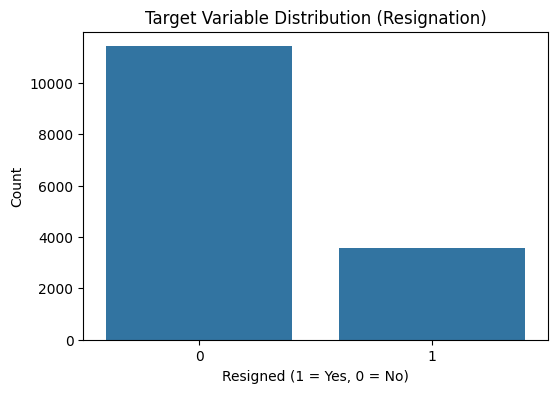

In [10]:
# Check the balance of the target variable (left)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="left")
plt.title("Target Variable Distribution (Resignation)")
plt.xlabel("Resigned (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()